In [1]:
#%matplotlib notebook 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# load the workbook
import os
workbook = pd.ExcelFile( "FirstDecayValues13_Submission.xlsx")
workbook.sheet_names # see all sheet names

relevant_columns = [
    "Strain","State","mmol g C fixed by Rubisco s-1","Rubisco Activation State","Chl ug/ml" 
]

combined_df = pd.DataFrame( columns = relevant_columns + ["Hours", "Date"] )

for sheet_name in workbook.sheet_names:
    if sheet_name.startswith("x"):
        print ( "skipping sheet" + sheet_name )
        continue
        
    print ("loading sheet " + sheet_name )
        
    sheet = workbook.parse(sheet_name)
    sheet.columns = [col.strip() for col in sheet.columns]
    
    # get data from columns a,b,i,j,k
    
    # only look at rows 1, 4, 7, 10
    # remember row numbers are different in the excel window 
    
    for row in [1, 4, 7, 10]: 
        combined_df_row = len(combined_df.index)
        for col in relevant_columns:
            combined_df.loc[combined_df_row,col] = sheet.loc[row,col]
            
        # always get hours from K2
        combined_df.loc[combined_df_row,"Hours"] = sheet.loc [0, "Hours"]
        combined_df.loc[combined_df_row,"Date"] = sheet_name
    
    

loading sheet Feb20
loading sheet Feb21
loading sheet March13
loading sheet Feb27
loading sheet March1
loading sheet March4
loading sheet March5


<ipython-input-3-d29fa6a6d68a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[
<ipython-input-3-d29fa6a6d68a>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[


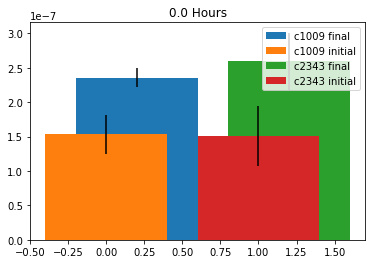

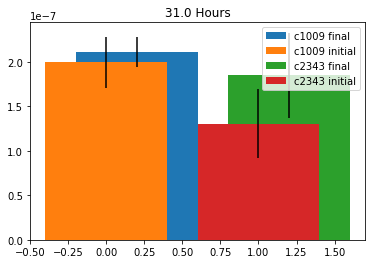

In [3]:

for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]

    plt.figure()

    for i,strain in enumerate(set(combined_df["Strain"])):


        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "final")]["mmol g C fixed by Rubisco s-1"]
        plt.bar( i+.2, values.mean(), yerr=values.std(), label=strain + " final")


        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "initial")]["mmol g C fixed by Rubisco s-1"]
        plt.bar( i, values.mean(), yerr=values.std(), label=strain + " initial")


    plt.title( str(hours) + " Hours" )
   # plt.ylim( 0, 1E-8 )
    plt.legend()
    plt.show()

<ipython-input-4-6795c64d996d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[
<ipython-input-4-6795c64d996d>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[


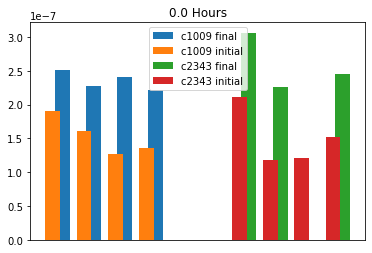

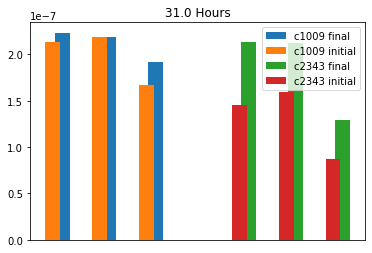

In [4]:

for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]

    plt.figure()

    for i,strain in enumerate(set(combined_df["Strain"])):


        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "final")]["mmol g C fixed by Rubisco s-1"]
        plt.bar( i*10 + .5 + np.linspace(0,5,len(values)), values, label=strain + " final")


        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "initial")]["mmol g C fixed by Rubisco s-1"]
        plt.bar( i*10 + np.linspace(0,5,len(values)), values, label=strain + " initial")


    plt.title( str(hours) + " Hours" )
    #plt.ylim( 0, 1.4E-8 )
    plt.xticks([])
    plt.legend()
    plt.show()

c1009
12    0.755233
16    0.704899
20    0.526623
24    0.614175
Name: Rubisco Activation State, dtype: object
c2343
14    0.690325
18    0.518686
22         NaN
26    0.621361
Name: Rubisco Activation State, dtype: object


<ipython-input-5-644a0046d1bf>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[


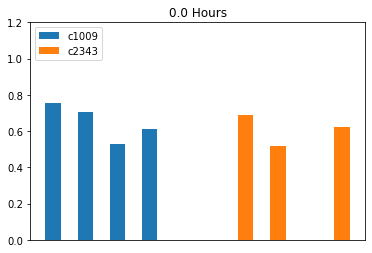

c1009
0    0.955522
4     1.00163
8    0.867593
Name: Rubisco Activation State, dtype: object
c2343
2     0.680395
6     0.753769
10    0.668614
Name: Rubisco Activation State, dtype: object


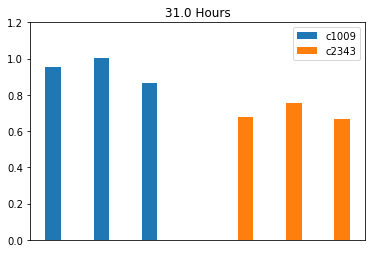

In [5]:

for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]

    plt.figure()

    for i,strain in enumerate(set(combined_df["Strain"])):
        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "initial")]["Rubisco Activation State"]
        plt.bar( i*10 + np.linspace(0,5,len(values)), values, label=strain )
        
        print( strain )
        print( values )


    plt.title( str(hours) + " Hours" )
    plt.ylim( 0, 1.2)
    plt.legend()
    plt.xticks([])
    plt.show()

<ipython-input-6-46d0263111b5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = sub_df[combined_df["Date"] != "Feb19"]
<ipython-input-6-46d0263111b5>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[
<ipython-input-6-46d0263111b5>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[


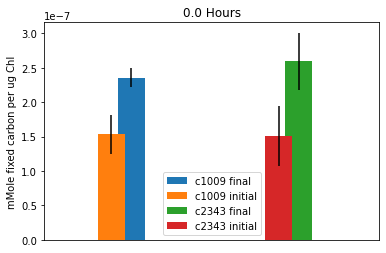

p-value between groups "c2343 final" and "c1009 final": 0.3220128582158739
p-value between groups "c2343 initial" and "c1009 initial": 0.9146967253914962


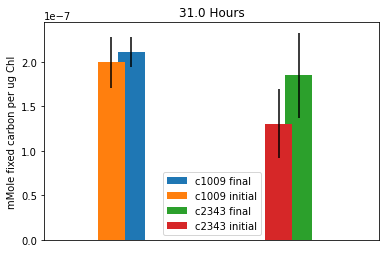

p-value between groups "c2343 final" and "c1009 final": 0.4206141405454102
p-value between groups "c2343 initial" and "c1009 initial": 0.06794055625831631


In [6]:
#Here we computed the averages but we excluded Feb 19 data because it was inflated 


for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]
    
    
    # exclude Feb19
    sub_df = sub_df[combined_df["Date"] != "Feb19"]
    
    
    # save alld istrubtions here when plotting
    values_dict = {}

    plt.figure()

    for i,strain in enumerate(set(combined_df["Strain"])):


        
        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "final")]["mmol g C fixed by Rubisco s-1"]
        plt.bar( i*5+.6, values.mean(), yerr=values.std(), label=strain + " final")
        values_dict[strain + " final"] = values
        

        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "initial")]["mmol g C fixed by Rubisco s-1"]
        plt.bar( i*5, values.mean(), yerr=values.std(), label=strain + " initial")
        values_dict[strain + " initial"] = values

    plt.title( str(hours) + " Hours" )
    #plt.ylim( 0, 7E-9 )
    plt.xticks([])
    plt.xlim(-2,8)
    plt.legend()
    plt.ylabel ("mMole fixed carbon per ug Chl")
    plt.show()
    
    for pair in [["c2343 final", "c1009 final"],["c2343 initial", "c1009 initial"]]:
        
        label_a,label_b = pair[0],pair[1]
        values_a,values_b = list(values_dict[pair[0]]),list(values_dict[pair[1]])
        values_a = np.array(values_a)[~np.isnan(values_a)]
        values_b = np.array(values_b)[~np.isnan(values_b)]
        
        #print( "comparing distributions: \n\t{0}:{1}\n\t{2}:{3}".format( label_a, values_a, label_b, values_b ) )
        
        _,p_value = stats.ttest_ind(values_a,values_b)
        
        print( "p-value between groups \"{0}\" and \"{1}\": {2}".format( label_a, label_b, p_value ))

In [7]:
# Here we have decided to convert this Rubisco activity rate to actual biomass accumulation rates
# based on a series of constants/converstion factors 
# the Rubisco activity is a measured here in mM C per ug of chlorophyll per second
# The conversions are 
# to convert mM to mole # 1 mole/1000mM 
# to convert the moles to amount of biomass # 26.6g/1 mole 
# your measurements are in ug of Chl you need to concert to ml so multiple by N 
# to convert the ml of chlorophyll to liters # 1000 ml/ 1 liter 
# to convert liters to how many liters you have in a m2 multiply by 150 
# then to convert seconds to hours multipley by 60*60
# to convert hours to days multiply by 14

# final result units are g C per m^2 of culture per day

def convert( rub_act, N ):
    #return rub_act  #mM C per ug of chlorophyll per second
    #/ 1000      #M C per ug of chlorophyll per second
    #* 26.6      #g C per ug of chlorophyll per second
    #* N         #g C per ml of culture per second
    #* 1000      #g C per L of culture per second
    #* 150       #g C per m^2 of culture per second
    #* 60*60     #g C per m^2 of culture per hour
    #* 12        #g C per m^2 of culture per day

    return rub_act / 1000* 26.6 * N * 1000 * 150 * 60*60 *10
        
convert( 1.66E-7, 1.05 )

25.036452000000004

<ipython-input-8-247558daf2cd>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = sub_df[combined_df["Date"] != "Feb19"]
<ipython-input-8-247558daf2cd>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_values = sub_df[
<ipython-input-8-247558daf2cd>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values_df = sub_df[


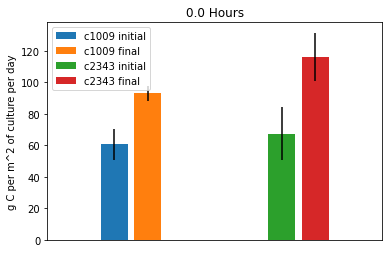

p-value between groups "c2343 final" and "c1009 final": 0.06076847574200286
p-value between groups "c2343 initial" and "c1009 initial": 0.5687667258402387


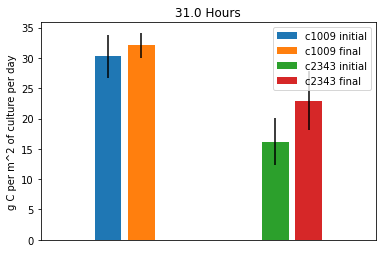

p-value between groups "c2343 final" and "c1009 final": 0.07106127524053894
p-value between groups "c2343 initial" and "c1009 initial": 0.019593278485530635


In [8]:
#Here we computed the averages but we excluded Feb 19 data because it was inflated 
# we also converted values using the function above

for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]
    
    
    # exclude Feb19
    sub_df = sub_df[combined_df["Date"] != "Feb19"]
    
    
    # save alld istrubtions here when plotting
    values_dict = {}

    plt.figure()

    for i,strain in enumerate(set(combined_df["Strain"])):


        n_values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "initial")]["Chl ug/ml"]
        values_dict[strain + " n values"] = list(n_values)
        
        for j,suffix in enumerate(["initial","final"]):
            values_df = sub_df[
                (combined_df["Strain"] == strain) & 
                (combined_df["State"] == suffix)]
            values = values_df["mmol g C fixed by Rubisco s-1"]
            values = np.array([convert(list(values)[i],list(n_values)[i]) for i in range(len(values))])
            combined_df.loc[values_df.index,"g C per m^2 of culture per day"] = values
            
            values = values[~np.isnan(values)]
            plt.bar( i*5+j, values.mean(), yerr=values.std(), label=strain + " " + suffix)
            values_dict[strain + " " + suffix] = values

    plt.title( str(hours) + " Hours" )
    #plt.ylim( 0, 7E-9 )
    plt.xticks([])
    plt.xlim(-2,8)
    plt.legend()
    plt.ylabel ("g C per m^2 of culture per day")
    plt.show()
    
    for pair in [["c2343 final", "c1009 final"],["c2343 initial", "c1009 initial"]]:
        
        label_a,label_b = pair[0],pair[1]
        values_a,values_b = list(values_dict[pair[0]]),list(values_dict[pair[1]])
        values_a = np.array(values_a)[~np.isnan(values_a)]
        values_b = np.array(values_b)[~np.isnan(values_b)]
        
        #print( "comparing distributions: \n\t{0}:{1}\n\t{2}:{3}".format( label_a, values_a, label_b, values_b ) )
        
        _,p_value = stats.ttest_ind(values_a,values_b)
        
        print( "p-value between groups \"{0}\" and \"{1}\": {2}".format( label_a, label_b, p_value ))

In [9]:
combined_df["Est Prod (w/Resp), g C per m^2 per day"] = combined_df["g C per m^2 of culture per day"] * (1.0-.5)

combined_df

,Strain,State,mmol g C fixed by Rubisco s-1,Rubisco Activation State,Chl ug/ml,Hours,Date,g C per m^2 of culture per day,"Est Prod (w/Resp), g C per m^2 per day"
0,c1009,initial,2.13339e-07,0.955522,1.0574,31,Feb20,32.403033,16.201516
1,c1009,final,2.2327e-07,NaN,1.0574,31,Feb20,33.911342,16.955671
2,c2343,initial,1.44923e-07,0.680395,0.86418,31,Feb20,17.989431,8.994716
3,c2343,final,2.12999e-07,NaN,0.86418,31,Feb20,26.439697,13.219848
4,c1009,initial,2.18562e-07,1.00163,1.0574,31,Feb21,33.196336,16.598168
5,c1009,final,2.18207e-07,NaN,1.0574,31,Feb21,33.142426,16.571213
6,c2343,initial,1.59861e-07,0.753769,0.86418,31,Feb21,19.843702,9.921851
7,c2343,final,2.12083e-07,NaN,0.86418,31,Feb21,26.325978,13.162989
8,c1009,initial,1.66579e-07,0.867593,1.0574,31,March13,25.300769,12.650384
9,c1009,final,1.92001e-07,NaN,1.0574,31,March13,29.162041,14.581020


<ipython-input-10-833bcb66a6c5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = sub_df[combined_df["Date"] != "Feb19"]
<ipython-input-10-833bcb66a6c5>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_values = sub_df[
<ipython-input-10-833bcb66a6c5>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values_df = sub_df[


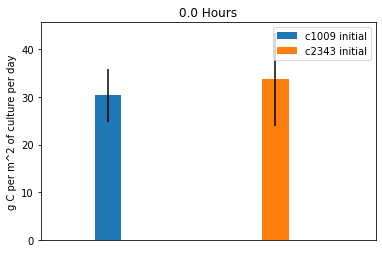

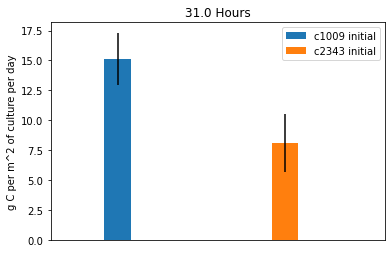

In [10]:
#Here we computed the averages but we excluded Feb 19 data because it was inflated 
# we also converted values using the function above

for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]
    
    
    # exclude Feb19
    sub_df = sub_df[combined_df["Date"] != "Feb19"]
    
    
    # save alld istrubtions here when plotting
    values_dict = {}

    plt.figure()

    for i,strain in enumerate(set(combined_df["Strain"])):


        n_values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "initial")]["Chl ug/ml"]
        values_dict[strain + " n values"] = list(n_values)
        
        for j,suffix in enumerate(["initial"]):
            values_df = sub_df[
                (combined_df["Strain"] == strain) & 
                (combined_df["State"] == suffix)]
            values = values_df["Est Prod (w/Resp), g C per m^2 per day"]
            
            values = values[~np.isnan(values)]
            plt.bar( i*5+j, values.mean(), yerr=values.std(), label=strain + " " + suffix)
            values_dict[strain + " " + suffix] = values

    plt.title( str(hours) + " Hours" )
    #plt.ylim( 0, 7E-9 )
    plt.xticks([])
    plt.xlim(-2,8)
    plt.legend()
    plt.ylabel ("g C per m^2 of culture per day")
    plt.show()
    

<ipython-input-11-b07ca79231ff>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = sub_df[combined_df["Date"] != "Feb19"]
<ipython-input-11-b07ca79231ff>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = sub_df[


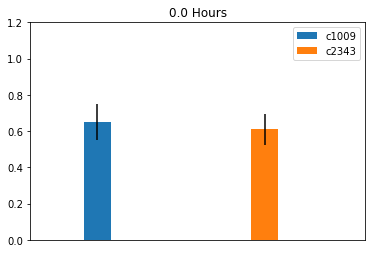

p-value between groups "c1009" and "c2343": 0.6057177505261433


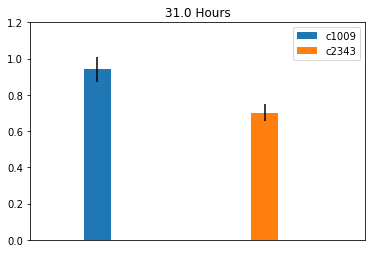

p-value between groups "c1009" and "c2343": 0.007143284206565823


In [11]:
for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]
    
    
    # exclude Feb19
    sub_df = sub_df[combined_df["Date"] != "Feb19"]

    plt.figure()
    
    strain_values = {}

    for i,strain in enumerate(set(combined_df["Strain"])):
        values = sub_df[
            (combined_df["Strain"] == strain) & 
            (combined_df["State"] == "initial")]["Rubisco Activation State"]
        
        # plot each value
        #plt.bar( i*10 + np.linspace(0,5,len(values)), values, label=strain )
        
        # plot average
        plt.bar( i*5, values.mean(), yerr=values.std(), label=strain)
        
        strain_values[strain] = values


    plt.title( str(hours) + " Hours" )
    plt.ylim( 0, 1.2)
    plt.xlim(-2,8)
    plt.legend()
    plt.xticks([])
    plt.show()
    
    for (i,label_a) in enumerate(strain_values.keys()):
        for (j,label_b) in enumerate(strain_values.keys()):
            if i < j:
                values_a,values_b = list(strain_values[label_a]),list(strain_values[label_b])
                values_a = np.array(values_a)[~np.isnan(values_a)]
                values_b = np.array(values_b)[~np.isnan(values_b)]

                _,p_value = stats.ttest_ind(values_a,values_b)

                print( "p-value between groups \"{0}\" and \"{1}\": {2}".format( label_a, label_b, p_value ))

p-value between groups "c2343 final" and "c1009 final": 0.3220128582158747
p-value between groups "c2343 initial" and "c1009 initial": 0.9146967253914973
p-value between groups "c2343 final" and "c1009 final": 0.420614140545411
p-value between groups "c2343 initial" and "c1009 initial": 0.06794055625831631


<ipython-input-12-661c0423067e>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = sub_df[combined_df["Date"] != "Feb19"]
<ipython-input-12-661c0423067e>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values_df = sub_df[


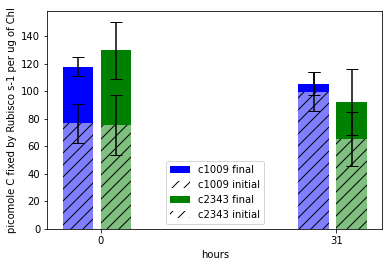

,mean,std
"c1009 final, 0.0 hours",117.727138,6.863334
"c1009 initial, 0.0 hours",76.687217,14.158695
"c2343 final, 0.0 hours",129.655514,20.847259
"c2343 initial, 0.0 hours",75.236124,21.782401
"c1009 final, 31.0 hours",105.579714,8.391883
"c1009 initial, 31.0 hours",99.746712,14.312258
"c2343 final, 31.0 hours",92.439812,23.956200
"c2343 initial, 31.0 hours",65.234742,19.349426


In [12]:
#Here we computed the averages but we excluded Feb 19 data because it was inflated 
# we also converted values using the function above

strain_colors = {
    "c1009": "blue",
    "c2343": "green",
}

suffix_patterns = {
    "final": None,
    "initial": "//"
}

# this dataframe will contain plot data 
# it will have two cells (avg/std) for each bar that is plotted
result_df = pd.DataFrame()


x,y,yerr = {},{},{}

for hours in set(combined_df["Hours"]):
    sub_df = combined_df[combined_df["Hours"] == hours]
    
    
    # exclude Feb19
    sub_df = sub_df[combined_df["Date"] != "Feb19"]
    
    
    # save alld istrubtions here when plotting
    values_dict = {}


    for i,strain in enumerate(set(combined_df["Strain"])):


        for j,suffix in enumerate(["final","initial"]):
            values_df = sub_df[
                (combined_df["Strain"] == strain) & 
                (combined_df["State"] == suffix)]
            values = values_df["mmol g C fixed by Rubisco s-1"]

            values = values[~np.isnan(list(values))]
            
            # OT April27
            # convert y-axis from mmol to picomole
            values = values * 1e9
            
            label=strain + " " + suffix
            if label not in x.keys():
                x[label] = []
                y[label] = []
                yerr[label] = []
            x[label].append( i*5 + hours - 3 )
            y[label].append( values.mean()/2 )
            yerr[label].append( values.std()/2)
            values_dict[label] = values
            
            # OT April27 
            # I don't know why, but to match the existing bar graphs everything is divided by two
            result_row_label = "{0}, {1} hours".format( label, hours )
            result_df.loc[result_row_label,"mean"] = values.mean()/2
            result_df.loc[result_row_label,"std"] = values.std()/2
    
    for pair in [["c2343 final", "c1009 final"],["c2343 initial", "c1009 initial"]]:
        
        label_a,label_b = pair[0],pair[1]
        values_a,values_b = list(values_dict[pair[0]]),list(values_dict[pair[1]])
        values_a = np.array(values_a)[~np.isnan(values_a)]
        values_b = np.array(values_b)[~np.isnan(values_b)]
        
        #print( "comparing distributions: \n\t{0}:{1}\n\t{2}:{3}".format( label_a, values_a, label_b, values_b ) )
        
        _,p_value = stats.ttest_ind(values_a,values_b)
        
        print( "p-value between groups \"{0}\" and \"{1}\": {2}".format( label_a, label_b, p_value ))

plt.figure()


for i,strain in enumerate(set(combined_df["Strain"])):
    for j,suffix in enumerate(["final","initial"]):
        label = strain + " " + suffix
        values = values[~np.isnan(list(values))]
        if suffix == "final":
            color = strain_colors[strain]
            alpha = 1
        else:
            color = "white"
            alpha = .5
        plt.bar( x[label], y[label], yerr=yerr[label], label=label, 
                color=color, hatch=suffix_patterns[suffix], alpha=alpha, capsize=6, width=4)
        values_dict[strain + " " + suffix] = values
        result_df



#plt.title( "title" )
#plt.ylim( 0, 7E-9 )
plt.xticks([0,31])
#plt.xlim(-10,42)
plt.legend()
plt.xlabel("hours")
plt.ylabel ("picomole C fixed by Rubisco s-1 per ug of Chl")
plt.savefig("rubisco_fig.png", dpi=200)
plt.show()

# save csv
#result_df.to_csv("results.csv")

# show results
result_df


In [13]:
# read biomass data
from StyleFrame import StyleFrame,utils

folder = "HighOxygen&PTOX/BiomassData/"
files = [
    "PBRexp111_20190104_RawData_c1009.xlsx",
    "PBRexp113_20190204_raw_data_C2343.xlsx"
]

# find a column by searching for some text
def find_col( biomass_sheet, col_name ):
    for col in biomass_sheet.columns:
        if col_name in biomass_sheet[col].values:
            return col
    raise Exception( "could not find \"{0}\" column".format( col_name ) )

# remove all rows that have non-white cells
def remove_color_rows( df ):
    for col in df.columns:
        if col == "Date":
            continue
        df = df.loc[[(df.loc[row,col].style.bg_color == "00000000") for row in df.index]]
    return df
    
# convert styleframe to regular dataframe (forget style information)
def to_df( sf ):
    result = pd.DataFrame()
    for col in sf.columns:
        if col == "Date":
            result[col] = sf[col]
        else:
            result[col] = [cell.value for cell in sf[col]]
    return result
    

# get biomass values from sheet "biomass" column "productivity..."
# get strain from sheet "refernce" column "ecotype"
# also get treatment from sheet Reference" column "treatemnt"

actual_biomass_df = None
for file in files:
    biomass_sheet = StyleFrame.read_excel( folder + file, sheet_name="Biomass", read_style=True, header=None)
    ref_sheet = StyleFrame.read_excel( folder + file, sheet_name="Reference", read_style=True)
    
    # extract productivity and reactor from biomass sheet
    df = pd.DataFrame()
    for col_name in ["Productivity (g/m^2/day)", "Reactor"]:
        col = find_col( biomass_sheet, col_name )
        
        df[col_name] = biomass_sheet[col]
        #df = df[~np.isnan(df[col_name])]
    
    # extract dates that are mixed into the reactor column
    date = ""
    all_dates = []
    for i,row in enumerate(df.index):
        if df["Reactor"][i] == "Reactor":
            date = str(df["Reactor"][i-1].value)
        all_dates.append(date)
    df["Date"] = all_dates
    
    # remove some rows with non-white cells
    df = remove_color_rows(df)
    
    # remove some rows based on contents
    df = to_df(df)
    df["Productivity (g/m^2/day)"] = pd.to_numeric(df["Productivity (g/m^2/day)"].values, errors="coerce")
    df = df[~np.isnan(df["Productivity (g/m^2/day)"])]
    
    # look up ecotypes and treatments based on reactors
    ref_sheet = remove_color_rows(ref_sheet)
    for reactor in set(df["Reactor"]):
        try:
            match = ref_sheet[ref_sheet["Reactor"] == reactor].index[0]
        except:
            raise Exception( "could not find reactor {0} in reference sheet".format( reactor ))
        for col in ["Ecotype","Treatment"]:
            df.loc[df["Reactor"] == reactor,col] = ref_sheet.loc[match,col]
    
    # lookup "days of treatment" based on dates
    ref_sheet["date"] = [str(ref_sheet["date"][i].value) for i in range(len(ref_sheet.index))]
    for date in set(df["Date"]):
        try:
            match = ref_sheet[ref_sheet["date"] == date].index[0]
        except:
            print( "could not find date {0} in ref sheet".format( date ) )
            continue
        df.loc[df["Date"] == date,"days of treatment"] = ref_sheet.loc[match,"days of treatment"]
        
    
    # remove rows with "days of treatment" < 0
    df["days of treatment"] = [float(v) for v in df["days of treatment"].values]
    #df["days of treatment"] = df["days of treatment"].convert_objects(convert_numeric=True)
    df = df[df["days of treatment"] >= 0]
    
    # add rows to actual_biomass_df
    if( actual_biomass_df is None):
        actual_biomass_df = df
    else:
        actual_biomass_df = pd.concat([actual_biomass_df, df])
    

ModuleNotFoundError: No module named 'StyleFrame'

In [ ]:
# boxplot of productivity by ecotype
# where treatment is "high oxygen"

sub_df = actual_biomass_df[actual_biomass_df["Treatment"] == "high oxygen"]

plt.figure()

for strain in set(sub_df["Ecotype"]):
    strain_df = sub_df[sub_df["Ecotype"] == strain]
    x_values, y_values, error_values = [],[],[]
    for time in set(strain_df["days of treatment"]):
        time_df = strain_df[strain_df["days of treatment"] == time]
        print( "found {0} values for strain {1} time {2}".format( len(time_df.index), strain, time))
        x_values.append( time )
        y_values.append( time_df["Productivity (g/m^2/day)"].mean())
        error_values.append( time_df["Productivity (g/m^2/day)"].std())
    plt.scatter( x_values, y_values, label=strain )
    

plt.legend()
plt.show()

In [ ]:
# plot actual and predicted productivity
# at hours = 0 (days = 0)
# at hours = 31 (days = 2)

# names and times
# [actual, predicted]
strain_names = [
    ["CC-1009", "c1009"],
    ["CC-2343", "c2343"]
]

strain_colors = [
    "blue",
    "green"
]

times = [
    [0,0],
    [2,31]
]

plt.figure()

for i,strain in enumerate(strain_names):
    strain_actual_df = actual_biomass_df[
        (actual_biomass_df["Ecotype"] == strain[0]) &
        (actual_biomass_df["Treatment"] == "high oxygen")]
    strain_predicted_df = combined_df[
        (combined_df["Strain"] == strain[1]) & 
        (combined_df["State"] == "initial")]
    
    x,y_predicted,y_actual,err_predicted,err_actual = [],[],[],[],[]
    for time in times:
        time_actual_df = strain_actual_df[strain_actual_df["days of treatment"] == time[0]]
        x.append( time[0] )
        y_actual.append( time_actual_df["Productivity (g/m^2/day)"].mean())
        err_actual.append(time_actual_df["Productivity (g/m^2/day)"].std())
        
        time_predicted_df = strain_predicted_df[strain_predicted_df["Hours"] == time[1]]
        y_predicted.append( time_predicted_df["Est Prod (w/Resp), g C per m^2 per day"].mean())
        err_predicted.append( time_predicted_df["Est Prod (w/Resp), g C per m^2 per day"].std())
        
        print( "found {0} predicted and {1} actual values for strain {2} time {3}".format( 
            len(time_predicted_df.index), len(time_actual_df.index), strain, time ))
        
    #plt.bar( i*5, values.mean(), yerr=values.std(), label=strain)
    plt.bar( np.array(x)*5+np.arange(len(x))+i,
            y_actual, yerr=err_actual, label=strain[0] + " actual",
            color=strain_colors[i]
           )
    plt.bar( np.array(x)*5+np.arange(len(x))+i+2,
            y_predicted, yerr=err_predicted, label=strain[0] + " predicted",
            fill=False, linewidth=2,
            edgecolor=strain_colors[i]
           )
    
    
    
    # plot predicted
    #plt.scatter( )
    
plt.xticks( [1.5,12.5],["0","1"])
    
plt.legend()
plt.show()

In [ ]:
# plot actual and predicted productivity
# at hours = 0 (days = 0)
# at hours = 31 (days = 2)

# names and times
# [actual, predicted]
strain_names = [
    ["CC-1009", "c1009"],
    ["CC-2343", "c2343"]
]

strain_colors = [
    "red",
    "blue"
]

times = [
    [0,0],
    [2,31]
]

plt.figure()

all_predicted, all_actual = [],[]

for i,strain in enumerate(strain_names):
    strain_actual_df = actual_biomass_df[
        (actual_biomass_df["Ecotype"] == strain[0]) &
        (actual_biomass_df["Treatment"] == "high oxygen")]
    strain_predicted_df = combined_df[
        (combined_df["Strain"] == strain[1]) & 
        (combined_df["State"] == "initial")]
    
    predicted,actual,err_predicted,err_actual = [],[],[],[]
    for time in times:
        time_actual_df = strain_actual_df[strain_actual_df["days of treatment"] == time[0]]
        actual.append( time_actual_df["Productivity (g/m^2/day)"].mean())
        err_actual.append(time_actual_df["Productivity (g/m^2/day)"].std())
        
        time_predicted_df = strain_predicted_df[strain_predicted_df["Hours"] == time[1]]
        predicted.append( time_predicted_df["Est Prod (w/Resp), g C per m^2 per day"].mean())
        err_predicted.append( time_predicted_df["Est Prod (w/Resp), g C per m^2 per day"].std())
        
        print( "found {0} predicted and {1} actual values for strain {2} time {3}".format( 
            len(time_predicted_df.index), len(time_actual_df.index), strain, time ))
        
    #plt.bar( i*5, values.mean(), yerr=values.std(), label=strain)
    plt.errorbar( predicted, actual, xerr=err_predicted, yerr=err_actual, label=strain )
    
    all_predicted += predicted
    all_actual += actual
    
    # plot predicted
    #plt.scatter( )
    
# plot fit line
slope, intercept, r_value, _,_ = stats.linregress( all_predicted, all_actual )
x = np.array([0,45])
plt.plot( x, slope*x + intercept, label="fit line r^2 = " + str(r_value**2) )
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel( "predicted")
plt.ylabel( "actual" )
plt.legend()
plt.show()

In [ ]:
predicted

In [ ]:
# boxplot of productivity by ecotype
# where treatment is "high oxygen"

sub_df = actual_biomass_df[actual_biomass_df["Treatment"] == "high oxygen"]

plt.figure()

for strain in set(sub_df["Ecotype"]):
    strain_df = sub_df[sub_df["Ecotype"] == strain]
    plt.scatter( strain_df["days of treatment"], strain_df["Productivity (g/m^2/day)"], label=strain )
    

plt.legend()
plt.show()